<a href="https://colab.research.google.com/github/gabrielqueeiroz/IA/blob/master/%C3%81rvore_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Árvores de decisão</h1>

<h2>Introdução</h2>

Classificação e regressão são tarefas de aprendizagem supervisionada, <b>onde objetiva-se aprender um padrão de relação entre entrada e a saída</b>.

- A  classificação é mais apropriada ao se trabalhar com saídas discretas (*e.g.*, ''sim'' ou ''não'');
- A regressão, por outro lado, é indicada para problemas com saídas contínuas como um valor real, por exemplo.
- Workshop do módulo IA.
- Módulo composto por Gabriel, Bia, Alex e Muller.

<h3>O que iremos ver?</h3>

- Organização de dataframe
- Funcionamento de árvore de decisão
- Apresentação da árvore de decisão

<h3>Baixando graphviz para visualização da árvore</h3>

In [1]:
! pip install graphviz
! apt-get install graphviz

E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


<h3>Importando bibliotecas</h3>

In [2]:
import pandas as pd #biblioteca para análise de dados
import numpy as np #biblioteca matemática do python
from datetime import datetime #biblioteca para trabalhar com tempo
from sklearn.model_selection import train_test_split #split na base de dados
from sklearn.tree import DecisionTreeClassifier #modelo árvore de decisão
from sklearn.metrics import accuracy_score #acuracia do modelo
from sklearn.dummy import DummyClassifier #dummy para fins de comparação
from sklearn.tree import export_graphviz #geração de plot
import graphviz #plot tbm

<h3>Importando dataframe</h3>

In [3]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


<h3>Dublando as colunas</h3>

In [4]:
colunas = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price': 'preco',
    'sold' : 'vendido'
}
df = df.rename(columns = colunas)
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


<h3>Trocando valores da coluna vendido por 0 e 1</h3>

In [5]:
trocar = {
    'no' : 0,
    'yes' : 1
}
df.vendido = df.vendido.map(trocar)
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


<h3>Adicionando coluna km por ano</h3>

In [6]:
df['km_por_ano'] = df.milhas_por_ano * 1.60934
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,0,21801,2000,30941.02,1,35085.22134
1,1,7843,1998,40557.96,1,12622.05362
2,2,7109,2006,89627.50,0,11440.79806
3,3,26823,2015,95276.14,0,43167.32682
4,4,7935,2014,117384.68,1,12770.11290


<h3>Adicionando a coluna idade do veículo</h3>

In [7]:
ano_atual = datetime.today().year
df['idade_do_veiculo'] = ano_atual - df.ano_do_modelo
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade_do_veiculo
0,0,21801,2000,30941.02,1,35085.22134,19
1,1,7843,1998,40557.96,1,12622.05362,21
2,2,7109,2006,89627.50,0,11440.79806,13
3,3,26823,2015,95276.14,0,43167.32682,4
4,4,7935,2014,117384.68,1,12770.11290,5


<h3>Drop nas colunas desnecessárias</h3>

In [8]:
df.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis = 1, inplace = True)
df.head()

,preco,vendido,km_por_ano,idade_do_veiculo
0,30941.02,1,35085.22134,19
1,40557.96,1,12622.05362,21
2,89627.50,0,11440.79806,13
3,95276.14,0,43167.32682,4
4,117384.68,1,12770.11290,5


<h3>Aplicação do algoritmo de árvore de decisão</h3>

In [9]:
x = df[['preco', 'idade_do_veiculo', 'km_por_ano']]
y = df['vendido']

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                       stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x),
                                                                     len(teste_x)))
modelo = DecisionTreeClassifier(max_depth = 2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acuracia foi %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 76.84%


<h3>Utilizando DummyClassifier para checar acurácia</h3>

In [10]:
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print('A acuracia do dummy foi %2f%%' % acuracia)

A acuracia do dummy foi 52.440000%


<h3>Plot da árvore de decisão</h3>

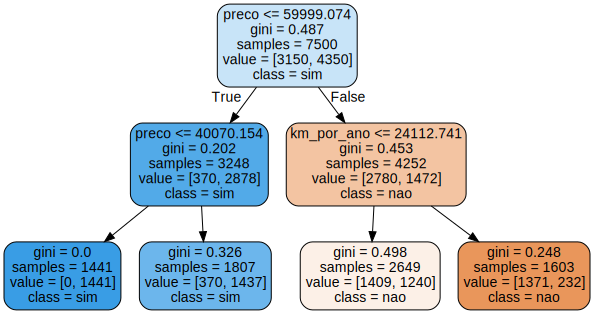

In [11]:
features = ['preco', 'idade_do_veiculo', 'km_por_ano']
dot_data = export_graphviz(modelo, out_file = None,
                           filled = True, rounded = True,
                          feature_names = features,
                          class_names = ['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico

Referências:
<ul>
    <li>https://scikit-learn.org/stable/modules/tree.html
        <li>https://www.datacamp.com/community/tutorials/decision-tree-classification-python
            <li>https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
            <li>Aula 5 de machine learning no alura

<b>Github: https://github.com/gabrielqueeiroz/IA</b>